In [556]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [557]:
data = pd.read_csv('Social_Network_Ads.csv')

In [558]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [559]:
data['click'] = data['EstimatedSalary'].apply(lambda x: 1 if x > 50000 else 0)

data.to_csv('updated_dataset.csv', index=False)
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased,click
0,15624510,Male,19,19000,0,0
1,15810944,Male,35,20000,0,0
2,15668575,Female,26,43000,0,0
3,15603246,Female,27,57000,0,1
4,15804002,Male,19,76000,0,1


In [560]:
def update_purchased(row):
    if row['EstimatedSalary'] < 50000 and row['click'] == 0:
        return 0
    elif row['EstimatedSalary'] >= 50000 and row['Age'] < 35:
        return 1
    else:
        return row['Purchased']
data['Purchased'] = data.apply(update_purchased, axis=1)

In [561]:
def determine_purchase(row):
    if row['Gender'] == 1 and row['EstimatedSalary'] > 40000 and row['Age'] < 40 and row['click'] == 1:
        return 1
    elif row['Gender'] == 0 and row['Age'] > 40 and row['EstimatedSalary'] < 30000 and row['click'] == 0:
        return 0
    else:
        return row['Purchased']
data['Purchased'] = data.apply(determine_purchase, axis=1)
data.to_csv('updated_dataset.csv', index=False)

print("Updated dataset saved with new purchase logic.")


Updated dataset saved with new purchase logic.


In [562]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
 5   click            400 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 18.9+ KB


In [563]:
data.shape

(400, 6)

In [564]:
data.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
click              0
dtype: int64

In [565]:
data.describe()

,User ID,Age,EstimatedSalary,Purchased,click
count,4.000000e+02,400.000000,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.447500,0.690000
std,7.165832e+04,10.482877,34096.960282,0.497859,0.463072
min,1.556669e+07,18.000000,15000.000000,0.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000,1.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000,1.000000


In [566]:
data.duplicated().sum()

0

In [567]:
data = data.drop(columns=['User ID'])

In [568]:
data.head()

,Gender,Age,EstimatedSalary,Purchased,click
0,Male,19,19000,0,0
1,Male,35,20000,0,0
2,Female,26,43000,0,0
3,Female,27,57000,1,1
4,Male,19,76000,1,1


In [569]:
data['Gender'].value_counts()

Gender
Female    204
Male      196
Name: count, dtype: int64

In [570]:
data['Age'].value_counts()

Age
35    32
37    20
26    16
41    16
42    16
39    15
40    15
48    14
47    14
27    13
38    13
28    12
36    12
46    12
31    11
30    11
49    10
29    10
33     9
32     9
24     9
59     7
19     7
45     7
20     7
60     7
34     6
23     6
52     6
25     6
58     6
53     5
57     5
22     5
18     5
21     4
50     4
54     4
55     3
56     3
51     3
43     3
44     2
Name: count, dtype: int64

In [571]:
data.sample(2)

,Gender,Age,EstimatedSalary,Purchased,click
263,Female,35,72000,0,1
369,Female,54,26000,0,0


In [572]:
data['EstimatedSalary'].value_counts()

EstimatedSalary
72000     12
80000     11
79000     10
75000      9
71000      9
          ..
123000     1
37000      1
115000     1
148000     1
139000     1
Name: count, Length: 117, dtype: int64

In [573]:
data['Purchased'].value_counts()

Purchased
0    221
1    179
Name: count, dtype: int64

In [574]:
data['click'].value_counts()

click
1    276
0    124
Name: count, dtype: int64

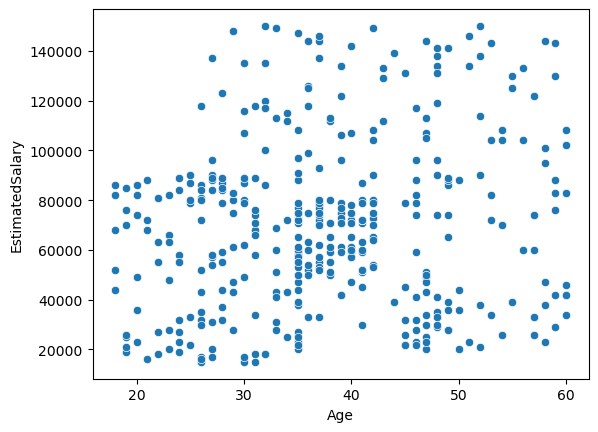

In [575]:
sns.scatterplot(x='Age', y='EstimatedSalary', data=data)
plt.show()

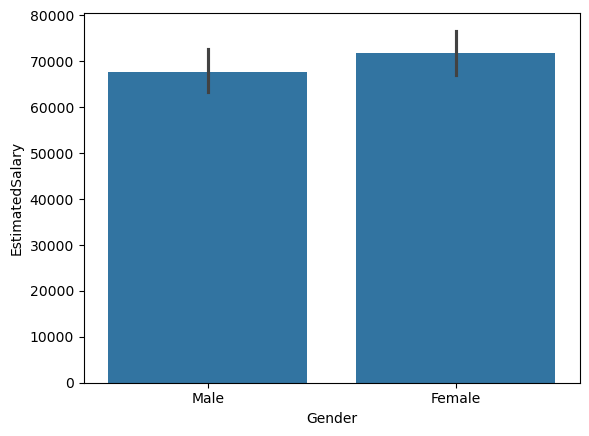

In [576]:
sns.barplot(x=data['Gender'],y=data['EstimatedSalary'])
plt.show()

# Encoding Categorical Data

In [577]:
data['Gender'] = data.Gender.map({'Male':1, 'Female':0})

In [578]:
data.head()

,Gender,Age,EstimatedSalary,Purchased,click
0,1,19,19000,0,0
1,1,35,20000,0,0
2,0,26,43000,0,0
3,0,27,57000,1,1
4,1,19,76000,1,1


# Dividing Data into x and y

In [579]:
x = data.drop(columns=['Purchased'])
y = data['Purchased']

In [580]:
x.head()

,Gender,Age,EstimatedSalary,click
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,1
4,1,19,76000,1


In [581]:
y.head()

0    0
1    0
2    0
3    1
4    1
Name: Purchased, dtype: int64

In [582]:
y.value_counts()

Purchased
0    221
1    179
Name: count, dtype: int64

In [583]:
data.isnull().sum()

Gender             0
Age                0
EstimatedSalary    0
Purchased          0
click              0
dtype: int64

# Finding Outlier

<Axes: ylabel='EstimatedSalary'>

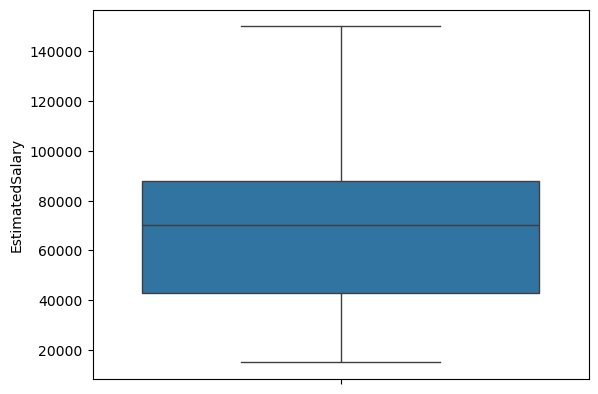

In [584]:
sns.boxplot(data['EstimatedSalary'])

<Axes: ylabel='Purchased'>

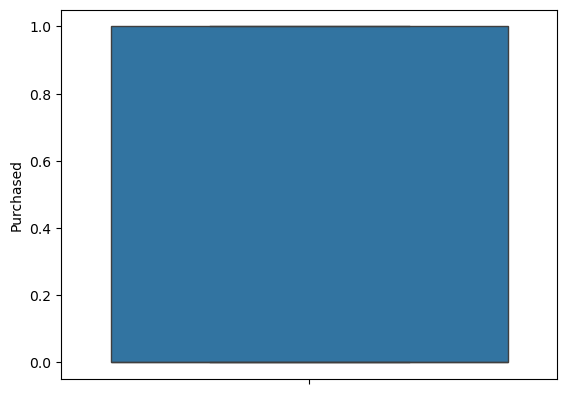

In [585]:
sns.boxplot(data['Purchased'])

<Axes: ylabel='Age'>

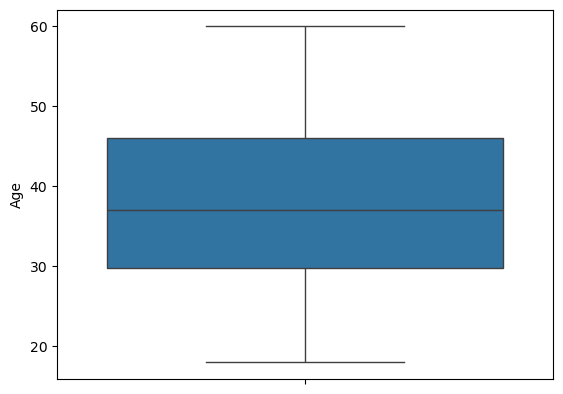

In [586]:
sns.boxplot(data['Age'])

# Spliting Data

In [587]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [588]:
x_train.head()

,Gender,Age,EstimatedSalary,click
3,0,27,57000,1
18,1,46,28000,0
202,0,39,134000,1
250,0,44,39000,0
274,0,57,26000,0


In [589]:
x_test.head()

,Gender,Age,EstimatedSalary,click
209,0,46,22000,0
280,0,59,88000,1
33,0,28,44000,0
210,0,48,96000,1
93,0,29,28000,0


In [590]:
x_train.shape

(320, 4)

In [591]:
x_test.shape

(80, 4)

# Data Scaling

In [592]:
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()

# # Scaling training and test data
# x_train_scaled = scaler.fit_transform(x_train)
# x_test_scaled = scaler.transform(x_test)

In [593]:
# x_train_new = pd.DataFrame(x_train_scaled, columns=x_train.columns)
# x_test_new = pd.DataFrame(x_test_scaled, columns=x_train.columns)

In [594]:
x_train.head()

,Gender,Age,EstimatedSalary,click
3,0,27,57000,1
18,1,46,28000,0
202,0,39,134000,1
250,0,44,39000,0
274,0,57,26000,0


# Model Training

In [595]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [596]:
lr = LogisticRegression()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)

C:\Users\Dell User\anaconda3\anaconda_install\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [597]:
Accuracy = accuracy_score(y_test,y_pred)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the model: {accuracy * 100:.2f}%")

Accuracy of the model: 82.50%


# Decision Tree

In [598]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred = dt.predict(x_test)

In [599]:
accuracy = accuracy_score(y_test,y_pred)
print(f"Accuracy is: {accuracy*100:.2f}%")

Accuracy is: 90.00%


# Random Forest

In [600]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)

In [601]:
accuracy = accuracy_score(y_test,y_pred)
print(f"acuuracy is: {accuracy*100:.2f}%")

acuuracy is: 95.00%


# SVC

In [602]:
from sklearn.svm import SVC
model = SVC()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

In [603]:
accuracy = accuracy_score(y_test,y_pred)
print(f"accuracy is:{accuracy*100:.2f}%")

accuracy is:80.00%


In [604]:
from sklearn.model_selection import cross_val_score

models = {
    'SVC': SVC(),
    'RandomForest': RandomForestClassifier(),
    'LogisticRegression': LogisticRegression(),
    'DecisionTree': DecisionTreeClassifier()
}

for name, model in models.items():
    scores = cross_val_score(model, x_train, y_train, cv=5)
    print(f"{name} Accuracy: {scores.mean() * 100:.2f}%")


SVC Accuracy: 80.00%
RandomForest Accuracy: 91.25%
LogisticRegression Accuracy: 83.44%
DecisionTree Accuracy: 90.00%


C:\Users\Dell User\anaconda3\anaconda_install\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Dell User\anaconda3\anaconda_install\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linea

# Select the final model

In [605]:
import pickle
with open('logistic_model.pkl', 'wb') as file:
    pickle.dump(lr, file)

In [606]:
input_data = np.array([[0, 30, 50000, 0]])
prediction = dt.predict(input_data)[0] 
if prediction == 1:
    result = "Yes Purchased"
if prediction == 0:
    result = "No Not Purchased"

print(f"Input Data: {input_data}")
print(f"Prediction: {result}")

Input Data: [[    0    30 50000     0]]
Prediction: Yes Purchased


C:\Users\Dell User\anaconda3\anaconda_install\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [607]:
predictions = lr.predict(x_train)
comparison = pd.DataFrame({
    'Actual': y_train,
    'Predicted': predictions
})
print(comparison.head()) 

     Actual  Predicted
3         1          0
18        0          0
202       1          1
250       0          0
274       0          0
